In [1]:
import numpy as np # for linear algebra
import pandas as pd # for data processing, 

Loading the data from the given csv file 

In [2]:
# Load the CSV file into a DataFrame
df = pd.read_csv('TaskData.csv')

#importing it into a list
import csv

with open('TaskData.csv', mode='r') as TaskData: # opening it in the read mode 
    csv_reader = csv.reader(TaskData)
    data = [row[0] for row in csv_reader]

print(data)  #just for checking 

['cokter', 'dentiists', 'Enginir', 'PoLICE', 'engneiear', 'DOcTRO', 'dentists', 'POLICE', 'enjeineaar', 'DENTISTT', 'nusye', 'tEaCHEr', 'docktor', 'nusre', 'architeft', 'tEACHEr', 'engeineer', 'dentists', 'POLicE', 'ENJINEER', 'engeniiar', 'enginear', 'accounTAnT', 'TEacher', 'POLIcE', 'denstists', 'pharmaccist', 'doktur', 'POlICE', 'DEIST', 'doctuor', 'dentists', 'doktoor', 'DENISST', 'doctore', 'lAWYREE', 'denttst', 'dactar', 'DOCTUER', 'tEacHER', 'TeaCHeR', 'doktr', 'doctar', 'poLIcE', 'TEaCHer', 'enjinear', 'TeaCHer', 'enjneear', 'TEACher', 'ARCHITEKCT', 'engineer', 'PHARMASICT', 'PoLICE', 'enjeneer', 'denist', 'nusrqe', 'acCOUNTANT', 'DENTSISTS', 'tEACHer', 'POLiCE', 'doctara', 'arkhitect', 'enjeeneear', 'archatekt', 'dactur', 'LAWYER', 'Enginnir', 'DENSTIST', 'tEaCHER', 'enjeeneer', 'enjineeer', 'poLIcE', 'tEACHeR', 'architet', 'LAWYR', 'enjeenir', 'accOUNtANT', 'TEACHer', 'Engenier', 'PoLICE', 'engieear', 'PoLICE', 'TEAcHeR', 'polICe', 'enjeineer', 'teachER', 'Engunir', 'nusxe',

Creating a list of all the given career options

In [25]:
career_options = [ "Doctor","Lawyer", "Teacher", "Engineer", "Accountant", "Police", "Architect","Dentist", "Pharmacist","Nurse"]

In [26]:
#changing the order of the career options alters their frequencies 

Defining a function calculating the levenshtein distance between two strings 

In [27]:
#function to calculate levenshtein distance between 2 strings 
def levenshtein_distance(a, b):
    rows = len(a) + 1
    cols = len(b) + 1
    dist = [[0 for x in range(cols)] for x in range(rows)]
    
    for i in range(1, rows):
        dist[i][0] = i
    
    for i in range(1, cols):
        dist[0][i] = i

    for col in range(1, cols):
        for row in range(1, rows):
            if a[row-1] == b[col-1]:
                count = 0
            else:
                count = 1
            dist[row][col] = min(dist[row-1][col] + 1,    # Delete
                                 dist[row][col-1] + 1,    # Insert
                                 dist[row-1][col-1] + count)  # Substitute

    return dist[rows-1][cols-1]

In [28]:
# Initialize arrays
num_data= len(data)
num_career = len(career_options)
s = np.zeros((num_data, num_career))
correct_options = [""] * num_data
print(num_data)

1406


In [29]:
#An empty 2D NumPy array s is created with dimensions (num_data, num_career) 
#and filled with zeros.It stores calculated distances of the data
#An empty list of correct options is created with a length equal to num_data.

In [30]:
import numpy as np

def levenshtein_distance(a, b):
    if len(a) < len(b):
        return levenshtein_distance(b, a)

    if len(b) == 0:
        return len(a)

    previous_row = range(len(b) + 1)
    for i, c1 in enumerate(a):
        current_row = [i + 1]
        for j, c2 in enumerate(b):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row

    return previous_row[-1]


num_data = len(data)
num_career = len(career_options)
s = np.zeros((num_data, num_career))
correct_options = [""] * num_data

# Compute the Levenshtein distance and find the closest target for each source
for i in range(num_data):
    for j in range(num_career):
        s[i, j] = levenshtein_distance(career_options[j], data[i])
    
    # Find the minimum distance(s)
    minimum = np.min(s[i])
    min_indices = np.where(s[i] == minimum)[0]
    
    # Handle ties by selecting the first occurrence
    min_idx = min_indices[0]
    correct_options[i] = career_options[min_idx]

    # Alternatively, handle ties by selecting a random option
    # min_idx = np.random.choice(min_indices)
    # correct_options[i] = career_options[min_idx]

# Print the results
for k in range(num_data):
    print(f"The closest option to '{data[k]}' is '{correct_options[k]}'")


The closest option to 'cokter' is 'Doctor'
The closest option to 'dentiists' is 'Dentist'
The closest option to 'Enginir' is 'Engineer'
The closest option to 'PoLICE' is 'Police'
The closest option to 'engneiear' is 'Engineer'
The closest option to 'DOcTRO' is 'Doctor'
The closest option to 'dentists' is 'Dentist'
The closest option to 'POLICE' is 'Police'
The closest option to 'enjeineaar' is 'Engineer'
The closest option to 'DENTISTT' is 'Doctor'
The closest option to 'nusye' is 'Nurse'
The closest option to 'tEaCHEr' is 'Lawyer'
The closest option to 'docktor' is 'Doctor'
The closest option to 'nusre' is 'Nurse'
The closest option to 'architeft' is 'Architect'
The closest option to 'tEACHEr' is 'Doctor'
The closest option to 'engeineer' is 'Engineer'
The closest option to 'dentists' is 'Dentist'
The closest option to 'POLicE' is 'Police'
The closest option to 'ENJINEER' is 'Engineer'
The closest option to 'engeniiar' is 'Engineer'
The closest option to 'enginear' is 'Engineer'
The c

In [31]:
frequency_career = [0]*10
for i in range (10) :
    frequency_career[i]= correct_options.count(career_options[i])

In [32]:
print(frequency_career)

[327, 83, 166, 318, 35, 177, 54, 128, 21, 97]


 Using the MATPLOTLIB to show the frquency bar graphs of the careers
 

In [33]:
import matplotlib.pyplot as plt

In [34]:
#dataset
#y-axis is frequency_career
#x-axis is the career options
positions = range(len(frequency_career))


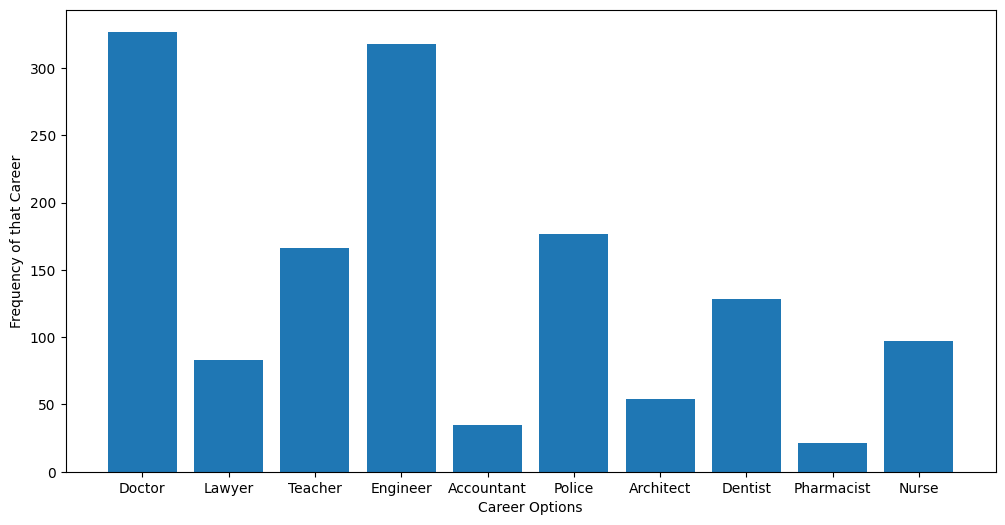

In [35]:
fig = plt.figure(figsize =(12,6))
plt.bar(positions,frequency_career,)
plt.xticks(positions,career_options)
plt.xlabel('Career Options')
plt.ylabel('Frequency of that Career')

plt.show()